# <div class="title_h1">Introduction to linear regression</div>

## <div class="title_h2">Batter up</div>

The movie [Moneyball](https://en.wikipedia.org/wiki/Moneyball_(film)) focuses on the "quest for the secret of success in baseball". It follows a low-budget team, the Oakland Athletics, who believed that underused statistics, such as a player's ability to get on base, better predict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these underused statistics turned out to be much more affordable for the team.

In this lab we'll be looking at data from all 30 Major League Baseball teams and examining the linear relationship between runs scored in a season and a number of other player statistics. Our aim will be to summarize these relationships both graphically and numerically in order to find which variable, if any, helps us best predict a team's runs scored in a season.

## <div class="title_h2">The data</div>

Let's load up the data for the 2011 season.

In [10]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/imranture/datasets/master/mlb11.csv'
url_content = requests.get(df_url, verify = False).content
mlb11 = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

mlb11

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766
5,New York Mets,718,5600,1477,108,0.264,1085,130,77,0.335,0.391,0.725
6,New York Yankees,867,5518,1452,222,0.263,1138,147,97,0.343,0.444,0.788
7,Milwaukee Brewers,721,5447,1422,185,0.261,1083,94,96,0.325,0.425,0.750
8,Colorado Rockies,735,5544,1429,163,0.258,1201,118,73,0.329,0.410,0.739
9,Houston Astros,615,5598,1442,95,0.258,1164,118,56,0.311,0.374,0.684


In addition to runs scored, there are seven traditionally used variables in the data set: at-bats, hits, home runs, batting average, strikeouts, stolen bases, and wins. There are also three newer variables: on-base percentage, slugging percentage, and on-base plus slugging. For the first portion of the analysis we'll consider the seven traditional variables. At the end of the lab, you'll work with the newer variables on your own.

<Axes: xlabel='at_bats', ylabel='runs'>

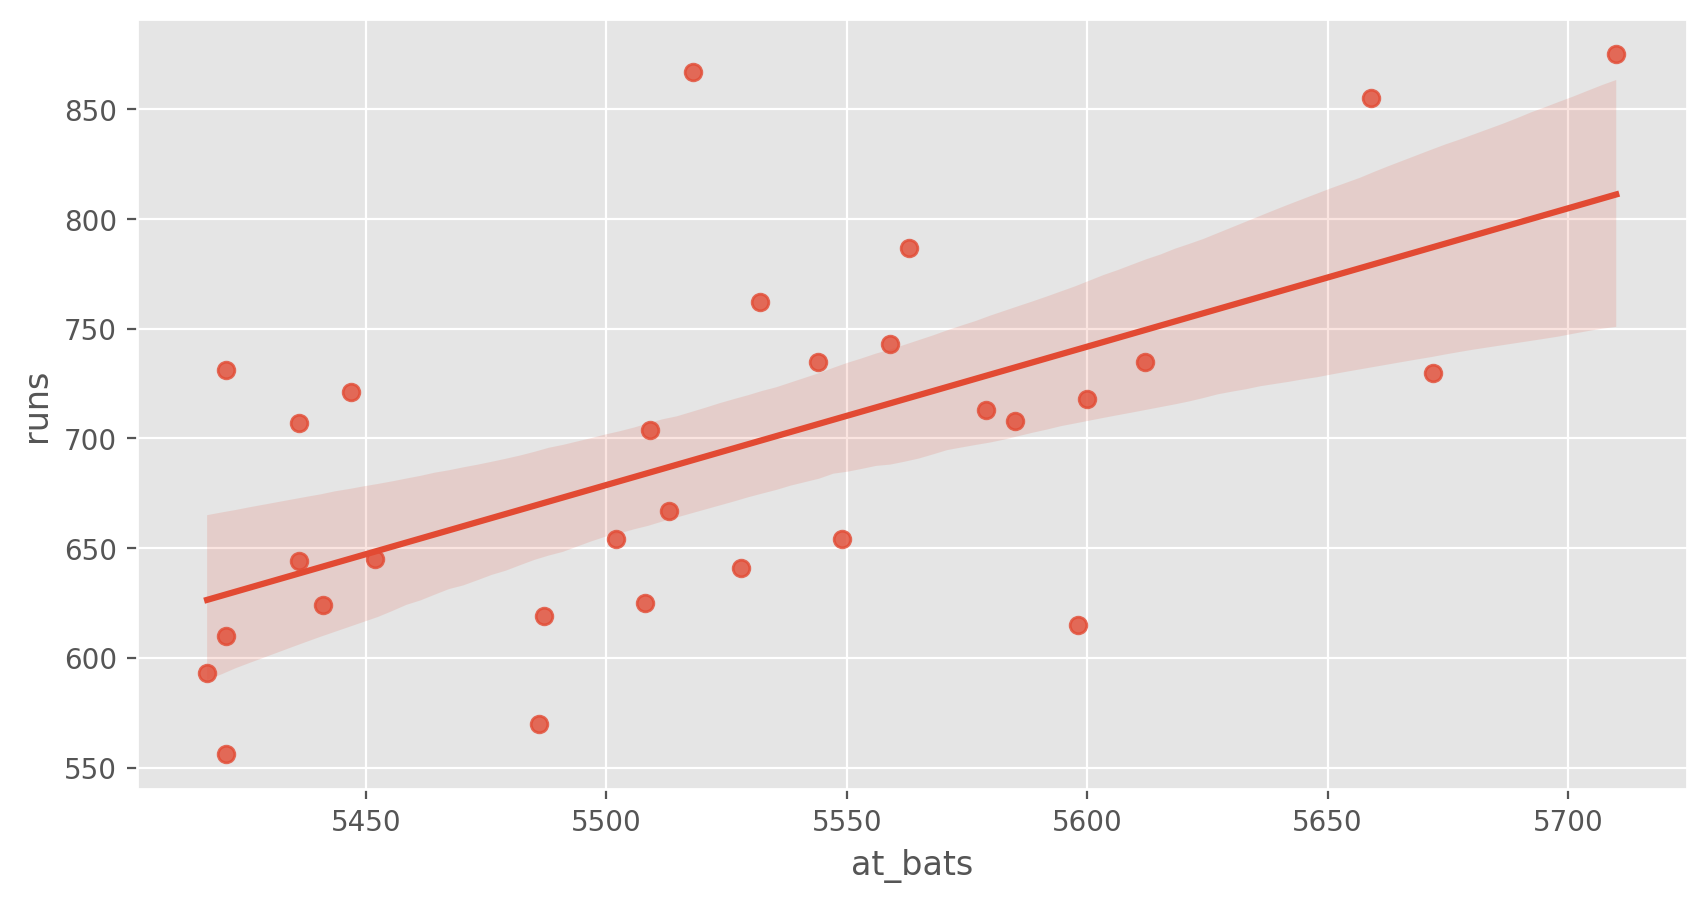

In [11]:
#import matplotlib as plt
#plt.plot(mlb11['at_bats'], mlb11['runs'], 'o')
#plt.show()

import seaborn as sns
sns.regplot(x = mlb11['at_bats'], y = mlb11['runs'])

If the relationship looks linear, we can quantify the strength of the relationship with the correlation coefficient.

In [12]:
mlb11['at_bats'].corr(mlb11['runs'])

np.float64(0.6106270467206688)

*Nearly normal residuals*: To check this condition, we can look at a histogram.

In [ ]:
residuals = (y - y_pred)
plt.hist(residuals, bins = 8)
plt.show();

or a normal probability plot of the residuals.

In [ ]:
from scipy.stats import probplot
probplot(residuals, plot = plt)
plt.show(); 

<div class = 'exercise'>
<h4>Exercise 6</h4>
Based on the histogram and the normal probability plot, does the nearly normal residuals condition appear to be met?</div>

*Constant variability*:

<div class = 'exercise'>
<h4>Exercise 7</h4>
Based on the plot in (1), does the constant variability condition appear to be met?
    </div>

---
### <div class="title_h3">On Your Own</div>

<ol>
    <li>Choose another traditional variable from <code>mlb11</code> that you think might be a good predictor of <code>runs</code>. Produce a scatterplot of the two variables and fit a linear model. At a glance, does there seem to be a linear relationship?</li><br>
    <li>How does this relationship compare to the relationship between <code>runs</code> and <code>at_bats</code>? Use the R squared values from the two model summaries to compare. Does your variable seem to predict <code>runs</code> better than <code>at_bats</code>? How can you tell?</li><br>
    <li>Now that you can summarize the linear relationship between two variables, investigate the relationships between <code>runs</code> and each of the other five traditional variables. Which variable best predicts <code>runs</code>? Support your conclusion using the graphical and numerical methods we've discussed (for the sake of conciseness, only include output for the best variable, not all five).</li><br>
    <li>Now examine the three newer variables. These are the statistics used by the author of <i>Moneyball</i> to predict a teams success. In general, are they more or less effective at predicting runs that the old variables? Explain using appropriate graphical and numerical evidence. Of all ten variables we've analyzed, which seems to be the best predictor of <code>runs</code>? Using the limited (or not so limited) information you know about these baseball statistics, does your result make sense?</li><br>
    <li>Check the model diagnostics for the regression model with the variable you decided was the best predictor for <code>runs</code></li>
</ol>

***

<div class = "license">
    This lab was adapted by <b>Vural Aksakalli</b> and <b>Imran Ture</b> from OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.
</div>